# 와인 데이터 분석

1. 알고리즘 : 최근접 분류, 회귀, 선형회귀, 랜덤포레스트 분류, 회귀
2. dataset : 레드, 화이트 와인 데이터셋
3. 데이터셋의 소개 : 종속변수(type), 독립변수(volatile acidity, citric acid, residual sugar, chlorides, total sulfur dioxide, pH, sulphates, alcohol)
    - 와인의 종류에 따른 등급, 성분등을 나눈 데이터셋
4. 문제유형 : 분류
5. 평가지표 : MSE, RMSE, R2score, (accuracy, MAE) 추가예정
6. 사용할 모델 : 

# 7. 사용 라이브러리

In [1]:
import numpy as np  # 넘파이
import pandas as pd  # 판다스
import seaborn as sns  # 시본
import matplotlib.pyplot as plt  # matplotlib

# 보팅 분류기, 랜덤포레스트 회귀
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
# 보팅용 학습알고리즘
# 로지스틱회귀, 선형회귀, 라쏘회귀, 릿지회귀, 최근접분류, 최근접회귀
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# 스케일링
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
# 데이터 분리
from sklearn.model_selection import train_test_split, GridSearchCV
# 정확도 라이브러리
# accuracy, MSE, MAE, R2score 사용
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
# 교차검증
from sklearn.model_selection import cross_validate, cross_val_score
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
# VIF 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 경고 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# 자동완성 속도 증가
%config Completer.use_jedi = False
# 한글 깨짐 해결
plt.rc('font', family='D2coding')

# 데이터셋 로딩

In [3]:
wine_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databa\
ses/wine-quality/winequality-red.csv', sep=';')
wine_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-data\
bases/wine-quality/winequality-white.csv', sep=';')

# 데이터 전처리

## 데이터프레임 결합

In [4]:
# 키 확인
print(wine_red.keys())
print(wine_white.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
# 데이터 프레임별 갯수 확인
print(wine_red.shape)
print(wine_white.shape)

(1599, 12)
(4898, 12)


In [6]:
# wine_red['type'] = 0 와 비슷하지만 인덱스 위치까지 설정가능
wine_red.insert(12, 'type', 0)

In [7]:
# 데이터 프레임에 적용되었는지 확인
wine_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [8]:
# wine_white['type'] = 1 와 비슷하지만 인덱스 위치까지 설정가능
wine_white.insert(12, 'type', 1)

In [9]:
# 데이터프레임에 적용되었는지 확인
wine_white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1


In [10]:
# 데이터프레임 결합
wine = pd.concat([wine_red, wine_white])
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [11]:
# 데이터프레임 행 섞기
wine = wine.sample(frac=1).reset_index(drop=True)

In [12]:
# 데이터프레임 정보 및 결측치 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


## 스케일링

In [13]:
# 스케일링 후 데이터프레임 확인
scaler = MinMaxScaler()

wine_scaled = wine.iloc[:, :-2]  # 원래 타겟인 quality와 추가된 type은 scale 안함
scaler.fit(wine_scaled)
wine_scaled = scaler.transform(wine_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
wine.iloc[:, :-2] = wine_scaled[:, :]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.214876,0.066667,0.289157,0.266871,0.074751,0.190972,0.407834,0.255832,0.201550,0.219101,0.072464,6,1
1,0.314050,0.266667,0.186747,0.033742,0.101329,0.010417,0.020737,0.189319,0.387597,0.185393,0.333333,6,0
2,0.388430,0.160000,0.253012,0.026074,0.109635,0.038194,0.029954,0.139387,0.325581,0.275281,0.550725,7,0
3,0.314050,0.390000,0.060241,0.013804,0.094684,0.090278,0.112903,0.181993,0.519380,0.162921,0.188406,5,0
4,0.264463,0.086667,0.204819,0.121166,0.039867,0.104167,0.569124,0.157895,0.387597,0.191011,0.362319,6,1


## 데이터 분리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    wine[['volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'total sulfur dioxide', 'pH',
          'sulphates', 'alcohol']], wine.iloc[:, -1:], random_state=0)

## 상관계수 확인

In [15]:
# 상관계수가 높은 순으로 정렬해서 출력
order = wine.corr().loc[:'quality', 'type'].abs().sort_values(ascending=False)
order

total sulfur dioxide    0.700357
volatile acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed acidity           0.486740
free sulfur dioxide     0.471644
density                 0.390645
residual sugar          0.348821
pH                      0.329129
citric acid             0.187397
quality                 0.119323
alcohol                 0.032970
Name: type, dtype: float64

## 다중공선성 확인

In [16]:
VIF = wine
VIF_train = wine[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                  'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]

def feature_engineering_XbyVIF(VIF_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(VIF_train.values, i)
                         for i in range(VIF_train.shape[1])]
    vif['Feature'] = VIF_train.columns
    return vif
vif = feature_engineering_XbyVIF(VIF_train)
print(vif)

   VIF_Factor               Feature
0    4.782395      volatile acidity
1    6.428842           citric acid
2    2.886009        residual sugar
3    4.173386             chlorides
4    6.025555  total sulfur dioxide
5    9.639739                    pH
6    6.772921             sulphates
7    5.518663               alcohol


## 필요한 열 추출

In [17]:
plot_cols = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'type']
plot_df = wine.loc[:, plot_cols]
plot_df.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,type
0,0.066667,0.289157,0.266871,0.074751,0.407834,0.201550,0.219101,0.072464,1
1,0.266667,0.186747,0.033742,0.101329,0.020737,0.387597,0.185393,0.333333,0
2,0.160000,0.253012,0.026074,0.109635,0.029954,0.325581,0.275281,0.550725,0
3,0.390000,0.060241,0.013804,0.094684,0.112903,0.519380,0.162921,0.188406,0
4,0.086667,0.204819,0.121166,0.039867,0.569124,0.387597,0.191011,0.362319,1


# 데이터 예측

## 최근접

### 최근접 분류

#### 최근접 분류 하이퍼파라미터 최적화
- GridSearhCV 사용

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    wine[['volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'total sulfur dioxide', 'pH',
          'sulphates', 'alcohol']], wine.iloc[:, -1:], random_state=0)

params = {
    'n_neighbors': (2, 3, 4, 5, 6, 7, 8)
}
knc_run = KNeighborsClassifier(n_jobs=-1)
grid_cv = GridSearchCV(knc_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'n_neighbors': 5}
최적 예측 정확도: 0.9871


C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### 모델 학습후 점수 출력

In [19]:
knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
scores = cross_validate(knc, X_train, y_train,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9910713704994423 0.9887099457694941


### 최근접 회귀

#### 최근접 회귀 하이퍼파라미터 최적화

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    wine[['volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'total sulfur dioxide', 'pH',
          'sulphates', 'alcohol']], wine.iloc[:, -1:], random_state=0)

params = {
    'n_neighbors': (2, 3, 4, 5, 6, 7, 8)
}
knr_run = KNeighborsRegressor(n_jobs=-1)
grid_cv = GridSearchCV(knr_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'n_neighbors': 2}
최적 예측 정확도: 0.9433


#### 모델 학습후 점수 출력

In [27]:
knr = KNeighborsRegressor(n_neighbors=2, n_jobs=-1)
scores = cross_validate(knr, X_train, y_train,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.982196971095795 0.9483231840221326


## 선형 회귀

### 모델 학습 후 점수 출력

In [28]:
lr = LinearRegression()
scores = cross_validate(lr, X_train, y_train,
                       return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.7629837260644475 0.7610272301076513


### 사이킷런 변환기

In [29]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
# 학습 후 학습한 형식에 맞게 훈련, 테스트데이터를 변환
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
# 컬럼명 추출
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6', 'x0^2 x7', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x3^2', 'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x4^2', 'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x5^2', 'x0 x5 x6', 'x0 x5 x7', 'x0 x6^2', 'x0 x6 x7', 'x0 x7^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1^2 x6', 'x1^2 x7', 'x1 x2^2', 'x1 x2 x3', 'x1 x2 x4', 'x1 x2 x5', 'x1 x2 x6', 'x1 x2 x7', 'x1 x3^2', 'x1 x3 x4', 'x1 x3 x5', 'x1 x3 x6', 'x1 x3 x7', 'x1 x4^2', 'x1 x4

### 최적화된 선 학습

In [30]:
lr.fit(train_poly, y_train)

LinearRegression()

### 성능 평가

In [62]:
y_train_pred = lr.predict(train_poly)
y_test_pred = lr.predict(test_poly)

# 훈련 데이터의 MSE, RMSE, score
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : %.4f" % train_mse)
print('Train RMSE : %.4f' % np.sqrt(train_mse))
print('Train score : %.4f' % lr.score(train_poly, y_train))

# 테스트 데이터의 MSE, RMSE, score
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" % test_mse)
print('Test RMSE : %.4f' % np.sqrt(test_mse))
print('Test score : %.4f' % lr.score(test_poly, y_test))

Train MSE : 0.0165
Train RMSE : 0.1284
Train score : 0.9123
Test MSE : 0.0203
Test RMSE : 0.1425
Test score : 0.8859


### 선형 회귀 하이퍼파라미터 최적화
- 선형 회귀는 모듈의 복잡도만 수정한 뒤 튜닝을 하지않고 성능평가를 진행 후 튜닝을 진행한다. 

### 성능평가 후 하이퍼파라미터 튜닝
- 과적합되어있기 때문에 릿지, 라쏘 회귀를 사용해서 편차를 줄인다.

#### 릿지 회귀

##### 최적 alpha 값 찾기

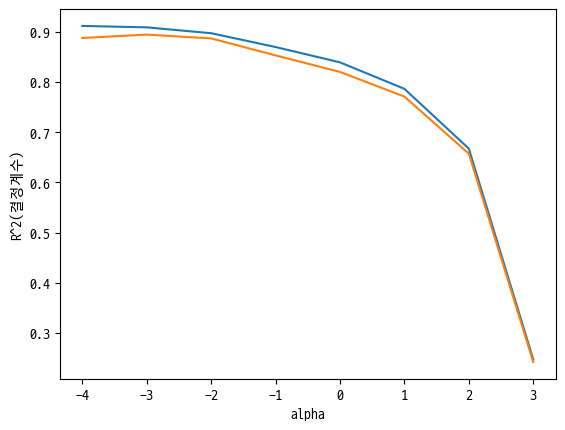

In [36]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
train_score = []
test_score = []

# 알파 값의 범주 설정
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_list:
    # ridge model
    ridge = Ridge(alpha=alpha)
    # ridge model
    ridge.fit(train_poly, y_train)
    # R^2 score(결정계수)
    train_score.append(ridge.score(train_poly, y_train))
    test_score.append(ridge.score(test_poly, y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2(결정계수)')
plt.show()
# alpha = 0.001 or 0.01

##### 릿지회귀 결과

In [52]:
ridge = Ridge(alpha=0.01)
ridge.fit(train_poly, y_train)
print('훈련 데이터 릿지 회귀 정확도 : {:.4f}'.format(ridge.score(train_poly, y_train)))
print('테스트 데이터 릿지 회귀 정확도 : {:.4f}'.format(ridge.score(test_poly, y_test)))
print('두 정확도의 편차 : {:.4f}'.format(
    (ridge.score(train_poly, y_train)-ridge.score(test_poly, y_test))))

훈련 데이터 릿지 회귀 정확도 : 0.8974
테스트 데이터 릿지 회귀 정확도 : 0.8870
두 정확도의 편차 : 0.0104


In [53]:
ridge = Ridge(alpha=0.001)
ridge.fit(train_poly, y_train)
print('훈련 데이터 릿지 회귀 정확도 : {:.4f}'.format(ridge.score(train_poly, y_train)))
print('테스트 데이터 릿지 회귀 정확도 : {:.4f}'.format(ridge.score(test_poly, y_test)))
print('두 정확도의 편차 : {:.4f}'.format(
    (ridge.score(train_poly, y_train)-ridge.score(test_poly, y_test))))

훈련 데이터 릿지 회귀 정확도 : 0.9091
테스트 데이터 릿지 회귀 정확도 : 0.8946
두 정확도의 편차 : 0.0145


##### 과대적합 거의 해결

##### 라쏘 회귀

##### 최적 alpha 값 찾기

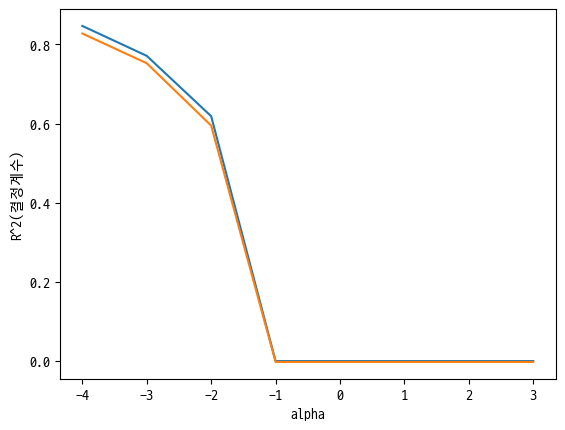

In [51]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
train_score = []
test_score = []

lasso = Lasso()

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
    # lasso model
    lasso = Lasso(alpha=alpha)
    # lasso model
    lasso.fit(train_poly, y_train)
    # R^2 score(결정계수)
    train_score.append(lasso.score(train_poly, y_train))
    test_score.append(lasso.score(test_poly, y_test))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2(결정계수)')
plt.show()
# alpha = 0.0001 or 0.001

In [59]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_poly, y_train)
print('훈련 데이터 라쏘 회귀 정확도 : {:.4f}'.format(lasso.score(train_poly, y_train)))
print('테스트 데이터 라쏘 회귀 정확도 : {:.4f}'.format(lasso.score(test_poly, y_test)))
print('두 정확도의 편차 : {:.4f}'.format(
    (ridge.score(train_poly, y_train)-ridge.score(test_poly, y_test))))

훈련 데이터 라쏘 회귀 정확도 : 0.7709
테스트 데이터 라쏘 회귀 정확도 : 0.7522
두 정확도의 편차 : 0.0145


In [60]:
lasso = Lasso(alpha=0.0001)
lasso.fit(train_poly, y_train)
print('훈련 데이터 라쏘 회귀 정확도 : {:.4f}'.format(lasso.score(train_poly, y_train)))
print('테스트 데이터 라쏘 회귀 정확도 : {:.4f}'.format(lasso.score(test_poly, y_test)))
print('두 정확도의 편차 : {:.4f}'.format(
    (ridge.score(train_poly, y_train)-ridge.score(test_poly, y_test))))

훈련 데이터 라쏘 회귀 정확도 : 0.8465
테스트 데이터 라쏘 회귀 정확도 : 0.8274
두 정확도의 편차 : 0.0145


##### 라쏘 회귀의 단점 확인
- 편차는 줄었지만 라쏘 회귀의 특성으로 인해 정확도가 내려간걸 확인할 수 있다.

## 랜덤포레스트

### 랜덤포레스트 분류

#### 랜덤포레스트 분류 하이퍼파라미터 최적화
- GridSearchCV 사용

In [295]:
X_train, X_test, y_train, y_test = train_test_split(
    wine[['volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'total sulfur dioxide', 'pH',
          'sulphates', 'alcohol']], wine.iloc[:, -1:], random_state=0)

params = {
    'n_estimators': (100, 200, 300),
    'max_depth': (5, 8),
    'min_samples_leaf': (8, 18),
    'min_samples_split': (8, 12, 16)
}
rf_run = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 300}
최적 예측 정확도: 0.9899


#### 모델 학습 후 점수 출력

In [298]:
rf = RandomForestClassifier(n_estimators=300, max_depth=8, min_samples_leaf=8, min_samples_split=12, n_jobs=-1)
scores = cross_validate(rf, X_train, y_train,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.993534487922917 0.9901481598483652


#### 모델 의존도 확인

In [269]:
rf.fit(X_train, y_train.values.ravel())

print(rf.feature_importances_)

[0.15981516 0.03700387 0.07236513 0.31905406 0.28705568 0.02602718
 0.08196303 0.01671591]


#### OOB 확인

In [299]:
# OOB(Out Of Bag) : 부트스트랩 샘플에 포함되지않고 남는 샘플
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train.values.ravel())

print(rf.oob_score_)

0.9924055829228243


### 랜덤포레스트 회귀

#### 랜덤포레스트 회귀 하이퍼파라미터 최적화
- GridSearchCV 사용

In [302]:
X_train, X_test, y_train, y_test = train_test_split(
    wine[['volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'total sulfur dioxide', 'pH',
          'sulphates', 'alcohol']], wine.iloc[:, -1:], random_state=0)

params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 12, 16)
}
rf_run = RandomForestRegressor(n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 300}
최적 예측 정확도: 0.9164


#### 모델 학습 후 점수 출력

In [304]:
rf = RandomForestRegressor(n_estimators=300, max_depth=8, min_samples_leaf=8, min_samples_split=16, n_jobs=-1)
scores = cross_validate(rf, X_train, y_train,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9532424538008055 0.9294316609465932


#### 모델 의존도 확인

In [305]:
rf.fit(X_train, y_train.values.ravel())

print(rf.feature_importances_)

[0.03905606 0.00103044 0.00361038 0.50852985 0.41849912 0.01028899
 0.01637551 0.00260965]


#### OOB 확인

In [306]:
# OOB(Out Of Bag) : 부트스트랩 샘플에 포함되지않고 남는 샘플
rf = RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train.values.ravel())

print(rf.oob_score_)

0.9507974143437167


## 앙상블

### 사용할 분류 알고리즘
- 로지스틱 회귀, 최근접 이웃 분류, 랜덤 포레스트 분류

In [69]:
LR = LogisticRegression(n_jobs=-1)
KNC = KNeighborsClassifier(n_jobs=-1)
RFC = RandomForestClassifier(n_jobs=-1)
SGD = SGDClassifier(n_jobs=-1)

### 보팅 분류기에 사용할 알고리즘 입력
- 하드, 소프트 보팅이 있지만 소프트 보팅이 예측 성능이 더 높음

In [70]:
voting_model = VotingClassifier(estimators=[
    ('LogisticRegression', LR), ('KNN', KNC), ('RandomForest', RFC)],
                                voting='soft', n_jobs=-1)

### 보팅 분류기 훈련 후 예측

In [65]:
voting_model.fit(X_train, y_train.values.ravel())
pred = voting_model.predict(X_test)

### 성능 평가

In [66]:
print('보팅 분류기 정확도 : {:.3f}'.format(accuracy_score(y_test, pred)))

보팅 분류기 정확도 : 0.992


### 개별 모델의 학습, 예측, 평가

In [71]:
classifier = [LR, KNC, RFC]

for model in classifier:
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    model_name = model.__class__.__name__
    print('{} 정확도 : {:.3f}'.format(model_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.978
KNeighborsClassifier 정확도 : 0.988
RandomForestClassifier 정확도 : 0.996


### 앙상블 사용 후 느낀점
- 보팅 분류기를 사용하니 분류 알고리즘밖에 사용할 수 없었다.
- 사용할 수 있는 알고리즘의 갯수가 너무 한정적이게 되었다.